# Exploratory Data Analysis and Visualization

In today's practice I will be looking into EDA and visualization, its workflow and best practices.This is going to be a series of continous practice and learning as I work on different ideas.

## EDA Workflow

Before I delve into today's practice, below are some of the EDA workflow

1. Build a DataFrame from the data (ideally, put all data in this object)
2. Clean the DataFrame. It should have the following properties
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore global properties. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore group properties. Use groupby and small multiples to compare subsets of the data.

## Effective EDA visualization

    1. Have graphical integrity
    2. Keep it simple
    3. Use the right display
    4. Use color sensibly
    
    
    
## A simple example on EDA viz.

How people feel about science.

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
rcParams['figure.figsize'] = 6,5
sns.set_context("poster")
sns.set_style('whitegrid')

# The Interest in Science

Dataframe construction

In [2]:
science = {
    'interest': ['Excited', 'Kind of interested', 'OK', 'Not great', 'Bored'],
    'before': [19, 25, 40, 5, 11],
    'after': [38, 30, 14, 6, 12]
    }
science_df = pd.DataFrame.from_dict(science).set_index("interest")[['before', 'after']]
science_df

,before,after
interest,,
Excited,19,38
Kind of interested,25,30
OK,40,14
Not great,5,6
Bored,11,12


In [8]:
science_df = pd.DataFrame(science).set_index('interest')[['before', 'after']]
science_df

,before,after
interest,,
Excited,19,38
Kind of interested,25,30
OK,40,14
Not great,5,6
Bored,11,12


## Pie charts

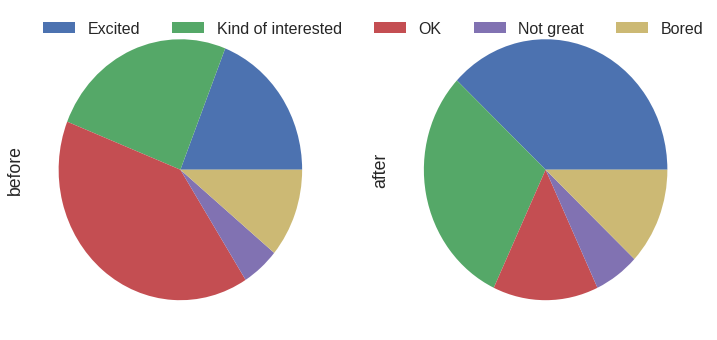

In [26]:
fig, axs = plt.subplots(1,2, figsize = (12,6))
science_df.before.plot(kind="pie", ax=axs[0], labels=None);
axs[0].legend(loc="upper left", ncol=5, labels=science_df.index)
science_df.after.plot(kind="pie", ax=axs[1], labels=None);

## Multiple bar chart

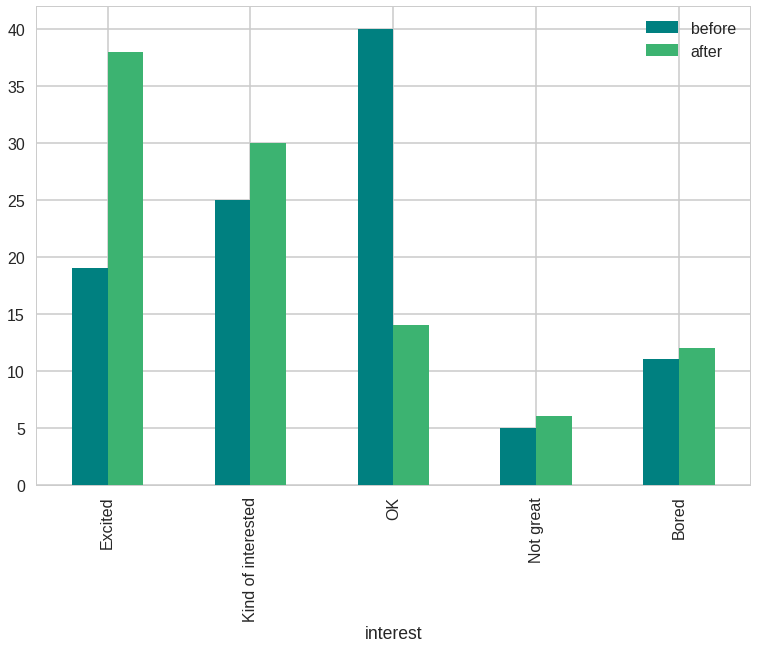

In [47]:
science_df.plot(kind = 'bar', color = ['teal', '#3CB371'])

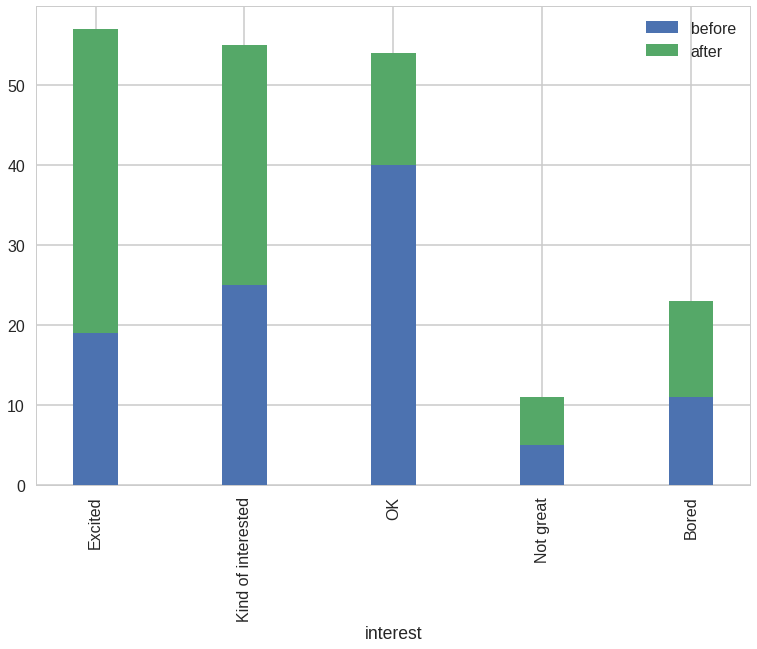

In [37]:
science_df.plot(kind = 'bar', width = 0.3, stacked = True)

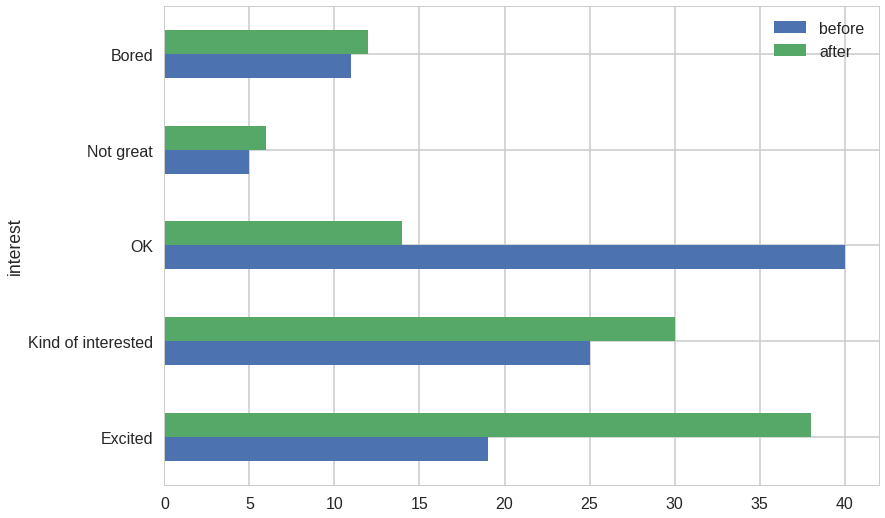

In [31]:
science_df.plot(kind = 'barh')

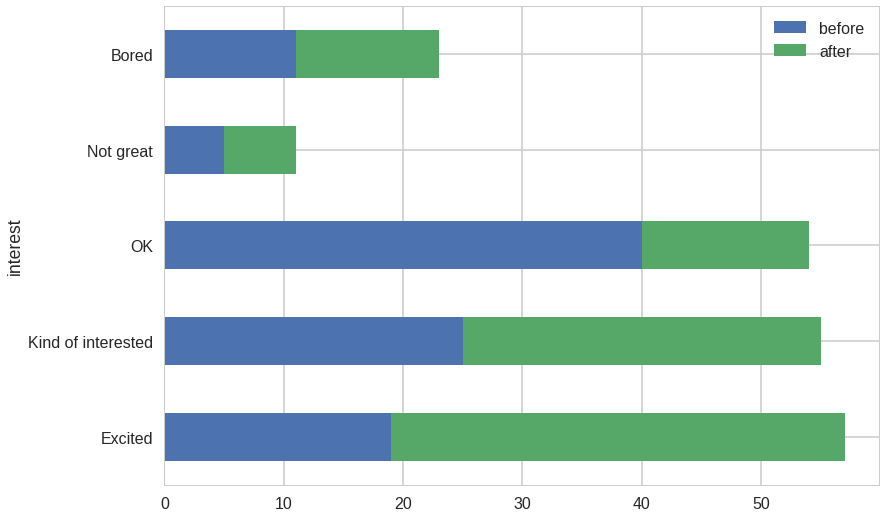

In [32]:
science_df.plot(kind = 'barh', stacked = True)

In [51]:
science_df

,before,after
interest,,
Excited,19,38
Kind of interested,25,30
OK,40,14
Not great,5,6
Bored,11,12


In [50]:
science_df.transpose()

interest,Excited,Kind of interested,OK,Not great,Bored
before,19,25,40,5,11
after,38,30,14,6,12


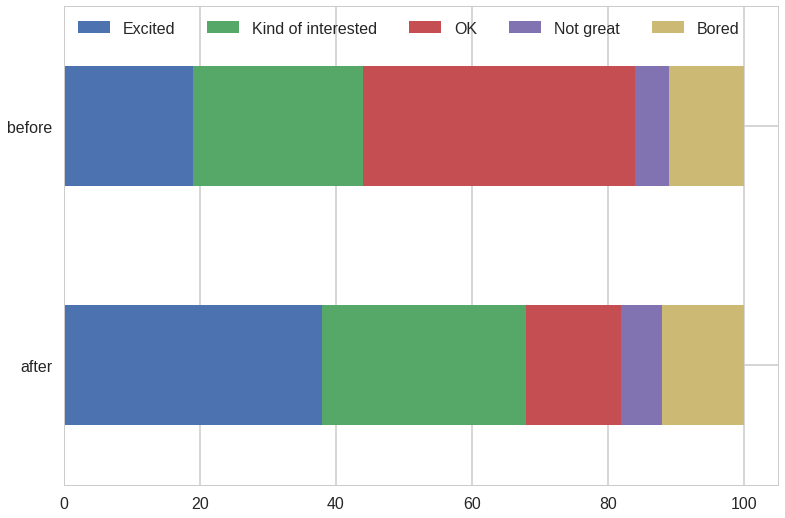

In [48]:
science_df.transpose().loc[['after', 'before'], :].plot(kind="barh", stacked=True)
plt.legend(loc=2, ncol=5);

## Difference bar chart

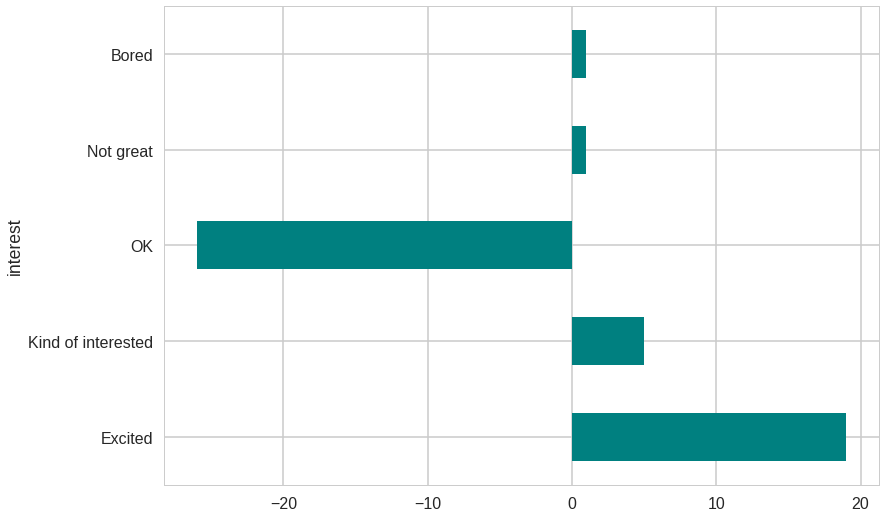

In [53]:
(science_df.after - science_df.before).plot(kind = 'barh', color = 'teal')

# Python Deliberate Practice Day4 - EDA and Visualization

In this practice, I'll be working on a real project that features EDA and visualization representing the number of road accidents in Great Britain from 2005 to 2014, grouped by severity (slight, serious, or fatal).

The presentation is [published online on my GitHub Page](https://github.com/udohsolomon/python_deliberate_practice/blob/master/Python%20Deliberate%20Practice%20Day4%20-%20EDA%20and%20Visualization.ipynb).

The source data sets are not included in this repository. To reproduce this presentation, you will need to download the zipped [All STATS19 data (accident, casualties and vehicle tables) for 2005 to 2014](https://data.gov.uk/dataset/road-accidents-safety-data/resource/8ecee6ac-33fd-4f5b-8973-e900cc65d24a) and [Road Safety - Accidents 2015](https://data.gov.uk/dataset/road-accidents-safety-data/resource/ceb00cff-443d-4d43-b17a-ee13437e9564) data sets, and then extract the `Accidents0514.csv` and `Accidents_2015.csv` files from these zip files in a subdirectory named `data`.

In [3]:
accident_data = pd.read_csv('Data/Accidents0514.csv', low_memory=False)
casualty_data = pd.read_csv('Data/Casualties0514.csv', low_memory=False)
vehicle_data = pd.read_csv('Data/Vehicles0514.csv', low_memory=False)
accident_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [4]:
#Coverting the Date column from string to integer to simplify grouping
accident_year = accident_data['Date'].apply(lambda s: int(s[-4:]))
accident_year.head()

0    2005
1    2005
2    2005
3    2005
4    2005
Name: Date, dtype: int64

In [5]:
#A better way of achieving that conversion is by converting the string to datetime which makes it easy to extract
#the year, month and day
accident_year = pd.to_datetime(accident_data["Date"])
accident_year.head()

0   2005-04-01
1   2005-05-01
2   2005-06-01
3   2005-07-01
4   2005-10-01
Name: Date, dtype: datetime64[ns]

In [6]:
accident_year.dt.year.head()

0    2005
1    2005
2    2005
3    2005
4    2005
Name: Date, dtype: int64

In [8]:
#Converting the time from string to datetime to simplify the extraction of hour of the day
accident_time = pd.to_datetime(accident_data["Time"])
accident_time.dt.hour.head()

0    17.0
1    17.0
2     0.0
3    10.0
4    21.0
Name: Time, dtype: float64

In [7]:
#Merging the newly converted date to the original table to ease grouping
accident_data_new = pd.concat([accident_data, accident_year.dt.year], axis = 1)
accident_data_new.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,1,1,2,2,0,0,1,1,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,5,4,1,1,0,0,1,1,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,4,1,1,0,0,1,1,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,1,1,1,0,0,1,1,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,7,1,2,0,0,1,1,E01002863,2005


In [9]:
accident_data_time = pd.concat([accident_data_new, accident_time.dt.hour], axis = 1)
accident_data_time.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date,Time
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,1,2,2,0,0,1,1,E01002849,2005,17.0
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,4,1,1,0,0,1,1,E01002909,2005,17.0
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,4,1,1,0,0,1,1,E01002857,2005,0.0
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,1,1,1,0,0,1,1,E01002840,2005,10.0
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,7,1,2,0,0,1,1,E01002863,2005,21.0


In [10]:
#A peep at all the headings of our table
accident_data_time.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Date', 'Time'],
      dtype='object')

In [16]:
accident_data_new.columns.values[9] = 'Date_Num'

In [17]:
accident_data_time.columns.values[11] = 'Time_Num'

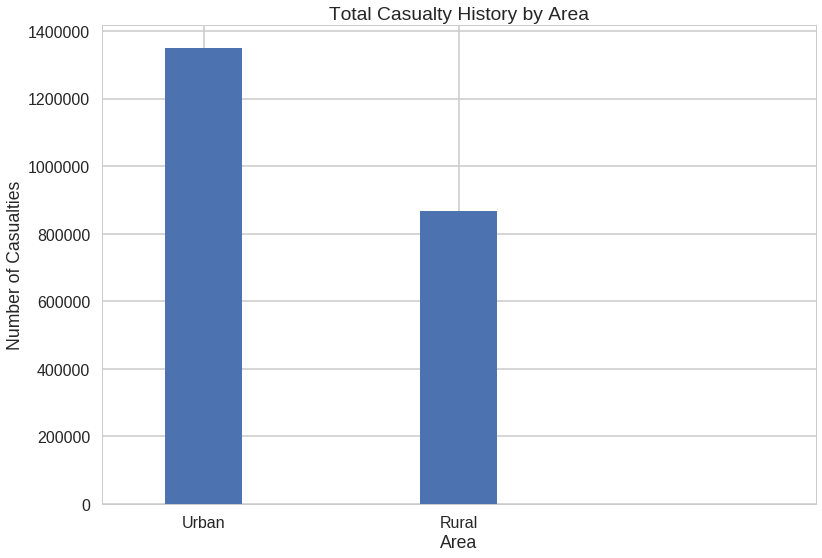

In [14]:
#Number of casualties by area. We achieve this by grouping the area (uban & rural) with the total number of casualties
areaGroup = accident_data.groupby('Urban_or_Rural_Area', as_index=False).agg({"Number_of_Casualties": "sum"})
ax = areaGroup["Number_of_Casualties"].plot(kind="bar", title="Total Casualty History by Area", width=0.3)
plt.xticks(range(2), ["Urban", "Rural"], rotation=0)
ax.set_ylabel("Number of Casualties")
ax.set_xlabel("Area")

In [ ]:
areaGroup = accident_data.groupby('Road_Type', as_index=False).agg({"Number_of_Casualties": "sum"})
ax = areaGroup["Number_of_Casualties"].plot(kind="bar", title="Total Casualty History by Area", color='teal')
plt.xticks(range(2), ["Urban", "Rural"], rotation=0)
ax.set_ylabel("Number of Casualties")
ax.set_xlabel("Road type")

In [18]:
#Here we grouped the number of casualties by the time of the day the accidents occur
timeGroup = accident_data_time.groupby('Time', as_index=False).agg({"Number_of_Casualties": "sum"})
timeGroup.tail()

,Time,Number_of_Casualties
19,19.0,115920
20,20.0,87661
21,21.0,71635
22,22.0,63016
23,23.0,50824


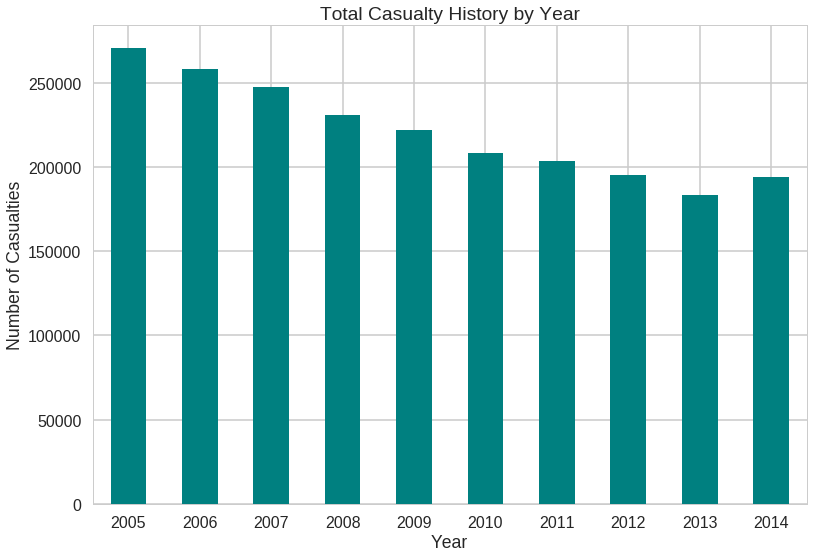

In [43]:
#The overal trend shows that there is significant reduction in road accident for the 19 year span considered
yearGroup = accident_data_new.groupby('Date', as_index=False).agg({"Number_of_Casualties": "sum"})
yearGroup
ax = yearGroup["Number_of_Casualties"].plot(kind="bar", title="Total Casualty History by Year", color = 'teal')
plt.xticks(range(10), ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014"], rotation=0)
ax.set_ylabel("Number of Casualties")
ax.set_xlabel("Year")

In [20]:
yearGroup

,Date,Number_of_Casualties
0,2005,271017
1,2006,258404
2,2007,247780
3,2008,230905
4,2009,222146
5,2010,208648
6,2011,203950
7,2012,195723
8,2013,183670
9,2014,194477


In [21]:
accidentGroup = accident_data_new.groupby(['Date', 'Accident_Severity']).agg({"Number_of_Casualties": "sum"})
accidentGroup

Number_of_Casualties
Date Accident_Severity                      
2005 1                                  5796
     2                                 38138
     3                                227083
2006 1                                  5680
     2                                 37880
     3                                214844
2007 1                                  5351
     2                                 36096
     3                                206333
2008 1                                  4398
     2                                 33987
     3                                192520
2009 1                                  3879
     2                                 32311
     3                                185956
2010 1                                  3256
     2                                 29418
     3                                175974
2011 1                                  3314
     2                                 29557
     3                                171079
2012 1                                  2938
     2                                 29591
     3                                163194
2013 1                                  2948
     2                                 27550
     3                                153172
2014 1                                  2898
     2                                 29024
     3                                162555

In [22]:
accidentGroup.unstack()


Number_of_Casualties               
Accident_Severity                    1      2       3
Date                                                 
2005                              5796  38138  227083
2006                              5680  37880  214844
2007                              5351  36096  206333
2008                              4398  33987  192520
2009                              3879  32311  185956
2010                              3256  29418  175974
2011                              3314  29557  171079
2012                              2938  29591  163194
2013                              2948  27550  153172
2014                              2898  29024  162555

In [23]:
timeGroup = accident_data_time.groupby(['Time', 'Accident_Severity']).agg({"Number_of_Casualties": "sum"})
timeGroup.tail()

Number_of_Casualties
Time Accident_Severity                      
22.0 2                                 11566
     3                                 49503
23.0 1                                  1762
     2                                  9703
     3                                 39359

In [24]:
timeGroup.unstack()

Number_of_Casualties               
Accident_Severity                    1      2       3
Time                                                 
0.0                               1414   7670   27135
1.0                               1190   5686   19605
2.0                               1064   4846   15374
3.0                                829   3779   12379
4.0                                694   2795    9169
5.0                                856   3542   12853
6.0                               1058   6120   28502
7.0                               1361  12011   72169
8.0                               1423  17368  134470
9.0                               1307  12558   91382
10.0                              1717  13306   84324
11.0                              1744  15098   98688
12.0                              1900  17157  113478
13.0                              2064  18189  116295
14.0                              2117  19233  115586
15.0                              2507  23964  143649
16.0                              2689  25414  151973
17.0                              2697  26679  164487
18.0                              2171  21939  127837
19.0                              2216  17675   96029
20.0                              1900  14525   71236
21.0                              1830  12699   57106
22.0                              1947  11566   49503
23.0                              1762   9703   39359

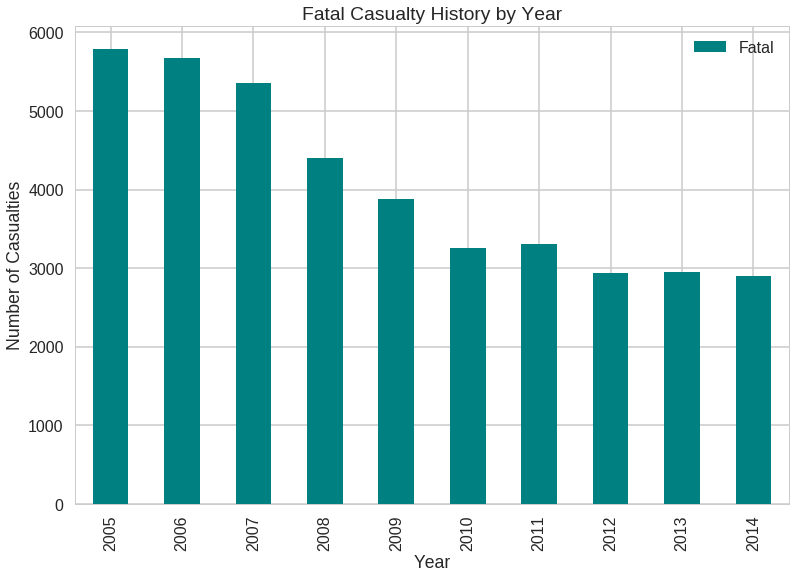

In [25]:
my_plot = accidentGroup.unstack(0)[0:-2]['Number_of_Casualties'].transpose().plot(kind = 'bar', stacked = False, title="Fatal Casualty History by Year", color ='teal')
my_plot.set_ylabel("Number of Casualties")
my_plot.set_xlabel("Year")
my_plot.legend(['Fatal'])

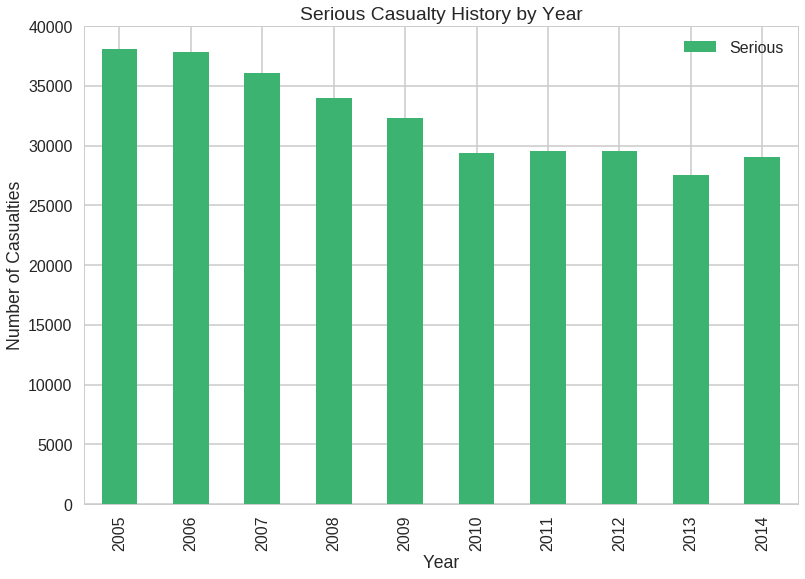

In [26]:
my_plot = accidentGroup.unstack(0)[1:-1]['Number_of_Casualties'].transpose().plot(kind = 'bar', stacked = False, title="Serious Casualty History by Year", color ='#3CB371')
my_plot.set_ylabel("Number of Casualties")
my_plot.set_xlabel("Year")
my_plot.legend(['Serious'])

In [27]:
accidentGroup.unstack(0)[2:]

Number_of_Casualties                                  \
Date                              2005    2006    2007    2008    2009   
Accident_Severity                                                        
3                               227083  214844  206333  192520  185956   

                                                           
Date                 2010    2011    2012    2013    2014  
Accident_Severity                                          
3                  175974  171079  163194  153172  162555

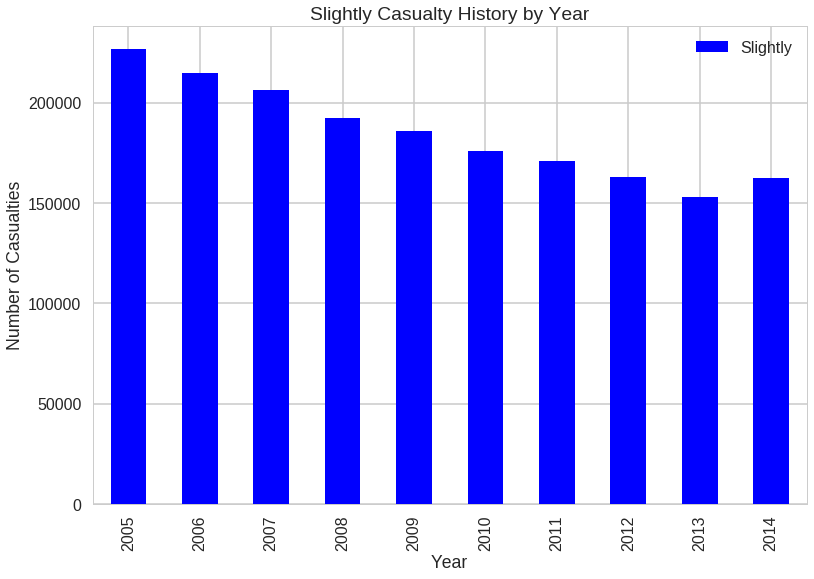

In [28]:
my_plot = accidentGroup.unstack(0)[2:]['Number_of_Casualties'].transpose().plot(kind = 'bar', stacked = False, title="Slightly Casualty History by Year", color ='blue')
my_plot.set_ylabel("Number of Casualties")
my_plot.set_xlabel("Year")
my_plot.legend(['Slightly'])

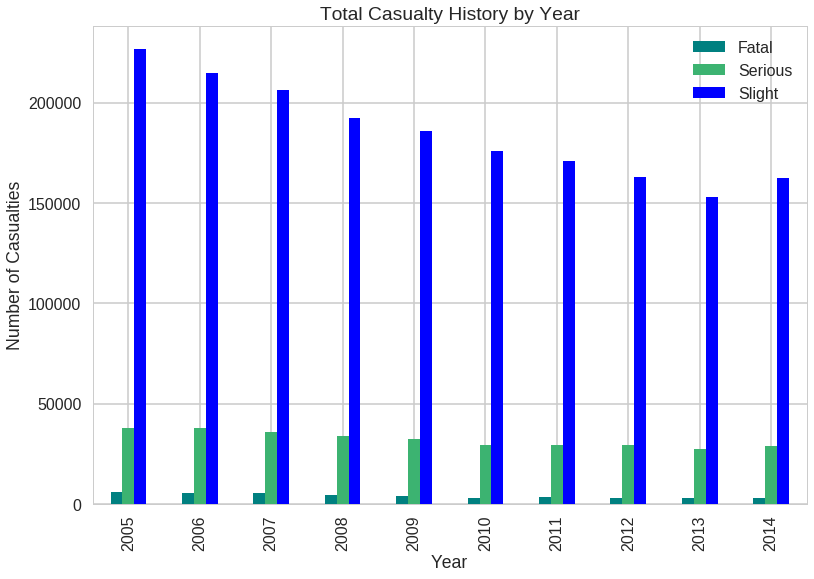

In [29]:
my_plot = accidentGroup.unstack().plot(kind='bar',stacked=False,title="Total Casualty History by Year", color =['teal', '#3CB371', 'blue'])
my_plot.set_ylabel("Number of Casualties")
my_plot.set_xlabel("Year")
my_plot.legend(['Fatal', 'Serious', 'Slight'])

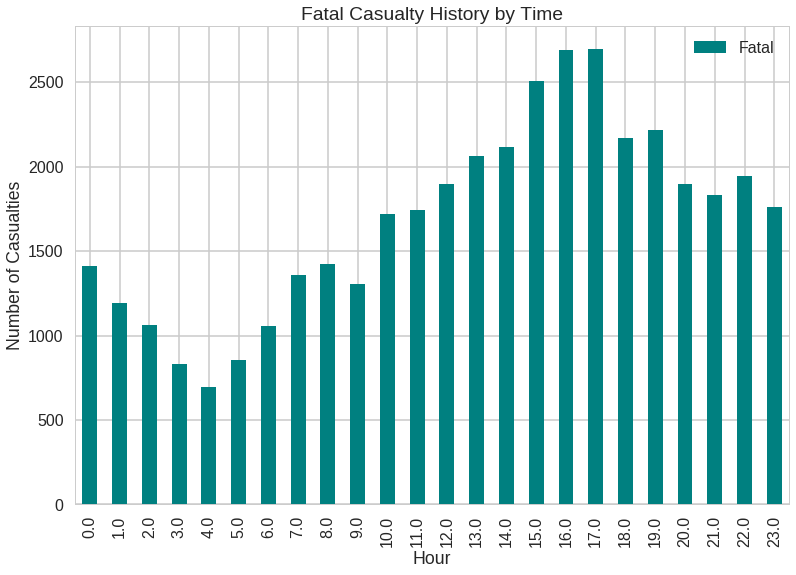

In [30]:
my_plot = timeGroup.unstack(0)[0:-2]['Number_of_Casualties'].transpose().plot(kind = 'bar', stacked = False, title="Fatal Casualty History by Time", color ='teal')
my_plot.set_ylabel("Number of Casualties")
my_plot.set_xlabel("Hour")
my_plot.legend(['Fatal'])

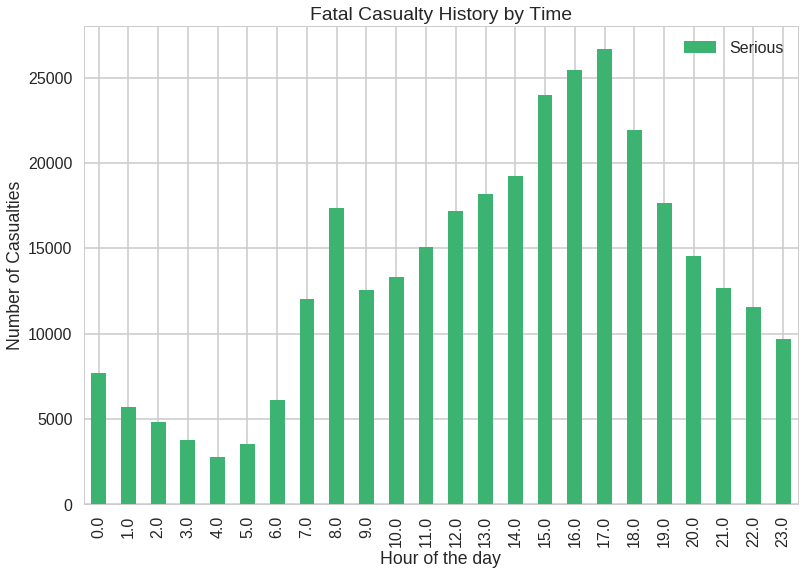

In [31]:
my_plot = timeGroup.unstack(0)[1:-1]['Number_of_Casualties'].transpose().plot(kind = 'bar', stacked = False, title="Fatal Casualty History by Time", color ='#3CB371')
my_plot.set_ylabel("Number of Casualties")
my_plot.set_xlabel("Hour of the day")
my_plot.legend(['Serious'])

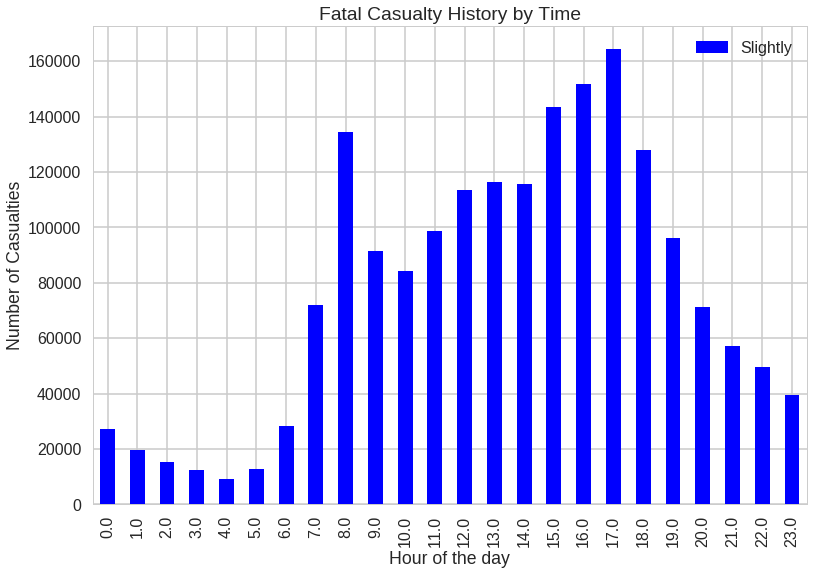

In [32]:
my_plot = timeGroup.unstack(0)[2:]['Number_of_Casualties'].transpose().plot(kind = 'bar', stacked = False, title="Fatal Casualty History by Time", color ='blue')
my_plot.set_ylabel("Number of Casualties")
my_plot.set_xlabel("Hour of the day")
my_plot.legend(['Slightly'])

In [38]:
dayGroup = accident_data_new.groupby('Day_of_Week', as_index=False).agg({"Number_of_Casualties": "sum"})
dayGroup

,Day_of_Week,Number_of_Casualties
0,1,261577
1,2,309957
2,3,322215
3,4,324922
4,5,324829
5,6,361331
6,7,311889


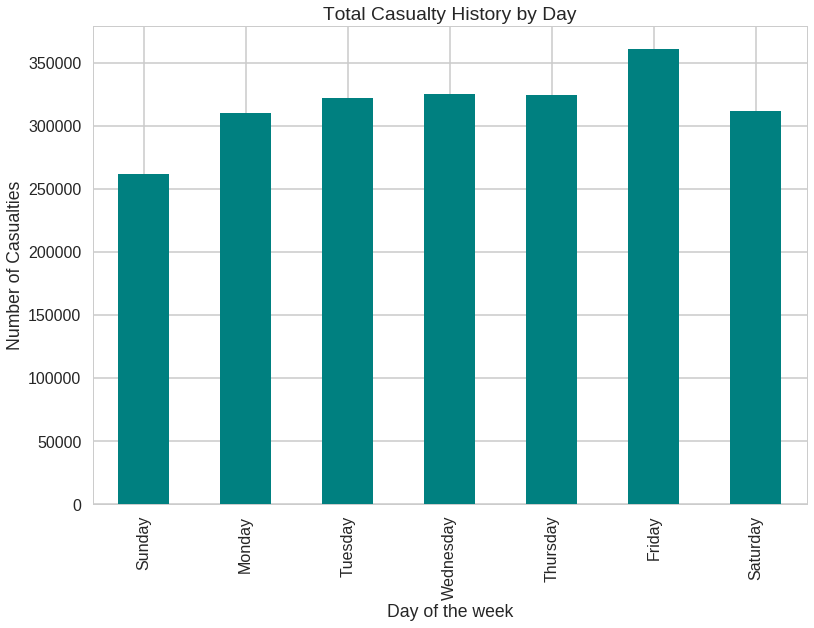

In [42]:
#Friday shows the day most accidents happens, this is not surprising as most people always head hope to over the weekend
#after a busy week of work
ax = dayGroup["Number_of_Casualties"].plot(kind="bar", title="Total Casualty History by Day", color = 'teal')
plt.xticks(range(7), ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],rotation=90)
ax.set_ylabel("Number of Casualties")
ax.set_xlabel("Day of the week")

In [33]:
casualty_data.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [34]:
len(casualty_data)

2216720

In [35]:
gender_counts = np.unique(casualty_data['Casualty_Severity'].replace(str('-1'), 'NaN', regex=True).values, return_counts=True)
gender_counts

(array([1, 2, 3]), array([  23072,  249410, 1944238]))

In [36]:
vehicle_data.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [37]:
accident_data.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
1640592,2014984136414,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,0,0,6,3,3,0,0,2,1,NaN
1640593,2014984137514,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,0,0,6,1,3,0,0,2,1,NaN
1640594,2014984137714,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,0,0,4,1,4,0,0,2,1,NaN
1640595,2014984138414,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,0,0,6,2,2,0,0,2,1,NaN
1640596,2014984139614,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,24/12/2014,...,0,0,1,1,2,0,0,2,1,NaN
